In [57]:
import pandas as pd
import numpy as np

In [106]:
df1 = pd.read_csv(r'C:\henry_Chang\final_project\model\data\ML_total_industry_lastest_v4.csv')

In [117]:
df1

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,parent_PL,jointly_control_PL,...,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value,all_dividend
0,1101,台泥,2001,223575.0,33000.0,190575.0,0.0,190575.0,190575.0,0.0,...,0.0,0.0,44142550.0,0.0,0.0,16.93,0.000000,0.000000,0.000000,0.000000
1,1101,台泥,2002,316737.0,30000.0,286737.0,0.0,286737.0,286737.0,0.0,...,0.0,0.0,48046279.0,0.0,12270.0,18.17,0.100000,0.200000,0.346000,0.300000
2,1101,台泥,2003,2232182.0,470000.0,1762182.0,0.0,1762182.0,1762182.0,0.0,...,0.0,0.0,48887732.0,0.0,12515.0,18.12,0.350000,0.350000,0.990500,0.700000
3,1101,台泥,2004,4653526.0,232000.0,4421526.0,0.0,4421526.0,4421526.0,0.0,...,0.0,0.0,52105463.0,0.0,12953.0,18.63,0.700000,0.500000,1.722500,1.200000
4,1101,台泥,2005,6085844.0,309549.0,5776295.0,-72928.0,5703367.0,5703367.0,0.0,...,0.0,0.0,56420387.0,0.0,13601.0,18.94,1.405943,0.156216,1.801169,1.562159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,5876,上海商銀,2016,19219160.0,4107035.0,15112125.0,0.0,15112125.0,11748332.0,0.0,...,0.0,42788926.0,163022430.0,0.0,11397.0,29.56,1.500000,0.000000,1.500000,1.500000
27472,5876,上海商銀,2017,21208877.0,4589911.0,16618966.0,0.0,16618966.0,12385227.0,0.0,...,0.0,40623295.0,163033094.0,0.0,11397.0,30.09,1.800000,0.000000,1.800000,1.800000
27473,5876,上海商銀,2018,22936681.0,4575035.0,18361646.0,0.0,18361646.0,13711971.0,0.0,...,0.0,46865979.0,178021926.0,0.0,11397.0,32.07,2.000000,0.000000,2.000000,2.000000
27474,5876,上海商銀,2019,24630823.0,4906344.0,19724479.0,0.0,19724479.0,14661111.0,0.0,...,0.0,50658706.0,204226325.0,0.0,11397.0,34.35,2.050000,0.000000,2.050000,2.050000


In [118]:
df1.shape

(27457, 30)

In [119]:
(df1['cash_dividend']>0).sum()

19000

In [120]:
mask = (df1['cash_dividend']>0)

In [121]:
df_nonzero =df1[mask]

In [122]:
df_nonzero.shape

(19000, 30)

In [123]:
df_zero = df1[~mask]

In [124]:
df_zero.shape

(8457, 30)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
seed=42

In [127]:
df_zero_del, df_zero_save =  train_test_split(df_zero,test_size=0.1,random_state=seed)

In [128]:
df_zero_save.shape

(846, 30)

In [129]:
df1 = pd.concat([df_nonzero,df_zero_save],axis = 0)

In [130]:
df1.shape

(19846, 30)

In [163]:
df1 = df1[df1['cash_dividend'] <20]

In [164]:
df1.shape

(19792, 30)

## 相關矩陣

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
cols = df1.columns[3:]

In [166]:
cols

Index(['pre_tax_income', 'income_tax_expense', 'cont_oper_IL',
       'discont_oper_IL', 'profit', 'parent_PL', 'jointly_control_PL',
       'non_control_PL', 'earning_per_share', 'total_assets',
       'total_liabilities', 'stocks', 'capital_reserve', 'retained_earnings',
       'other_equity_interest', 'treasury_stock', 'parent_equity',
       'control_interest', 'non_control_interest', 'total_equity',
       'proceeds_issued', 'total_treasury_shares', 'book_value_per_share',
       'cash_dividend', 'stock_dividend', 'dividend_value', 'all_dividend'],
      dtype='object')

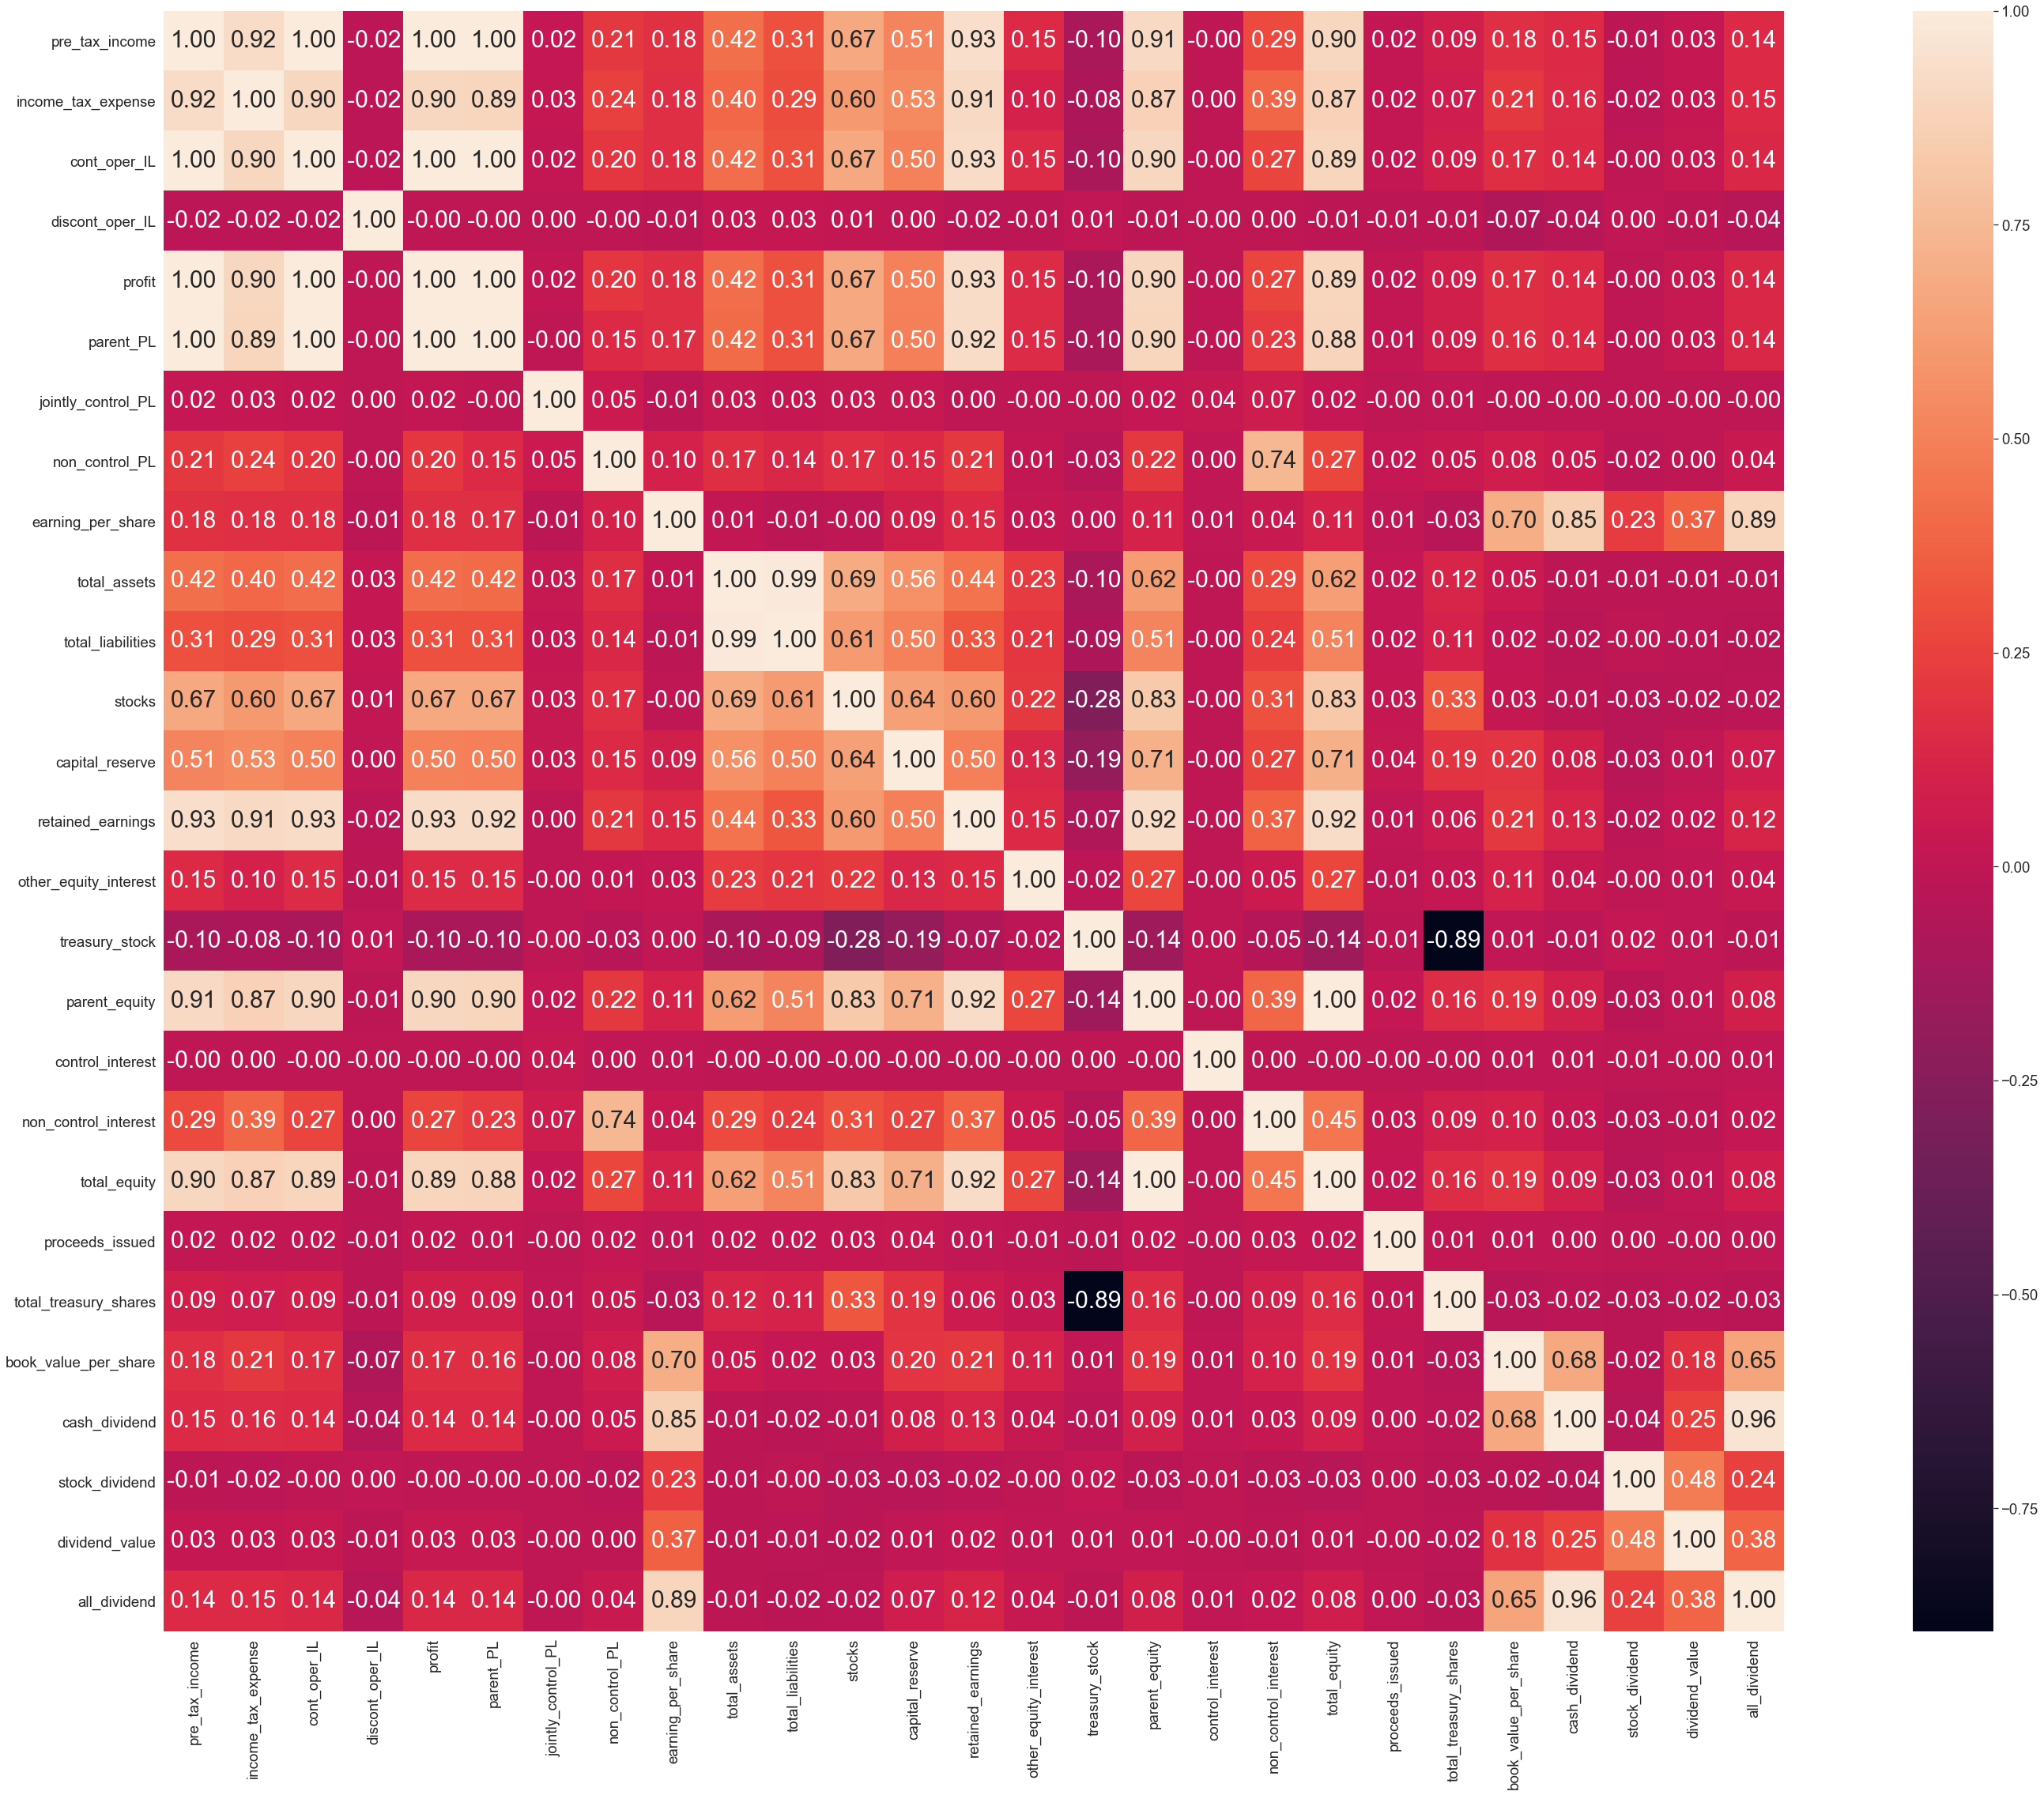

In [167]:
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.7)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout(rect=(0,0,8,8))

plt.show()

## 將數據集分為訓練用跟測試用

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
seed=42

In [170]:
df1.iloc[:,[11,25]]

,earning_per_share,book_value_per_share
1,0.02,18.17
2,0.60,18.12
3,1.59,18.63
4,1.97,18.94
5,2.20,21.34
...,...,...
17287,0.03,11.70
1804,-0.45,11.53
268,0.36,10.31
16306,-1.28,18.08


In [171]:
X = df1.iloc[:,3:26].values #特徵值為3-25
y_cash = df1['cash_dividend'].values  #標籤是cash_dividend
y_stock = df1['stock_dividend'].values  #標籤是stock_dividend
y_value = df1['dividend_value'].values  #標籤是dividend_value
y_dividend = df1['all_dividend'].values  #標籤是all_dividend = cash_dividend+stock_dividend

In [172]:
from sklearn.preprocessing import StandardScaler
#建立StandardScaler物件
sc = StandardScaler()
# 資料標準化
X_std = sc.fit_transform(X)

In [173]:
# y_cash
X_train, X_test, y_cash_train, y_cash_test =  train_test_split(X_std, y_cash,test_size=0.30,random_state=seed)

In [176]:
# y_dividend
X_train, X_test, y_dividend_train, y_dividend_test =  train_test_split(X_std, y_dividend,test_size=0.30,random_state=seed)

## 利用scikit-learn實作線性迴歸模型

In [177]:
from sklearn import linear_model

In [178]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [179]:
# y_cash
slr = linear_model.LinearRegression()
slr.fit(X_train, y_cash_train)
y_cash_test_pred = slr.predict(X_test)
y_cash_train_pred = slr.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_cash_train, y_cash_train_pred),r2_score(y_cash_test, y_cash_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_cash_train, y_cash_train_pred),mean_squared_error(y_cash_test, y_cash_test_pred)))
a = mean_squared_error(y_cash_train, y_cash_train_pred)
b = mean_squared_error(y_cash_test, y_cash_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_cash_test, y_cash_test_pred)))

R^2 train: 0.739, test: 0.763
MSE train: 1.051, test: 1.046
過擬合率: -0.004 , 正確率: 0.763


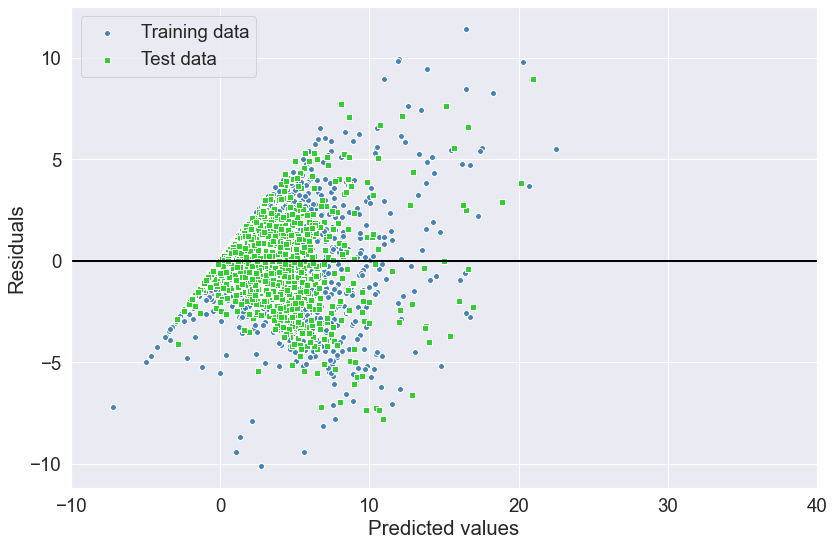

In [185]:
# 殘差圖
plt.scatter(y_cash_train_pred,  y_cash_train_pred - y_cash_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_cash_test_pred,  y_cash_test_pred - y_cash_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 40])
# plt.ylim([-30, 30])
plt.tight_layout(rect=(0,0,2,2))

plt.savefig('demo5_1.png', dpi=500)
plt.show()

In [181]:
# y_stock
slr = linear_model.LinearRegression()
slr.fit(X_train, y_stock_train)
y_stock_test_pred = slr.predict(X_test)
y_stock_train_pred = slr.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_stock_train, y_stock_train_pred),r2_score(y_stock_test, y_stock_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_stock_train, y_stock_train_pred),mean_squared_error(y_stock_test, y_stock_test_pred)))
a = mean_squared_error(y_stock_train, y_stock_train_pred)
b = mean_squared_error(y_stock_test, y_stock_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_stock_test, y_stock_test_pred)))

R^2 train: 0.120, test: 0.137
MSE train: 0.292, test: 0.294
過擬合率: 0.008 , 正確率: 0.137


In [182]:
# y_value
slr = linear_model.LinearRegression()
slr.fit(X_train, y_value_train)
y_value_test_pred = slr.predict(X_test)
y_value_train_pred = slr.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_value_train, y_value_train_pred),r2_score(y_value_test, y_value_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_value_train, y_value_train_pred),mean_squared_error(y_value_test, y_value_test_pred)))
a = mean_squared_error(y_value_train, y_value_train_pred)
b = mean_squared_error(y_value_test, y_value_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_value_test, y_value_test_pred)))

R^2 train: 0.125, test: 0.211
MSE train: 121.581, test: 87.133
過擬合率: -0.283 , 正確率: 0.211


In [183]:
# y_dividend
slr = linear_model.LinearRegression()
slr.fit(X_train, y_dividend_train)
y_dividend_test_pred = slr.predict(X_test)
y_dividend_train_pred = slr.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_dividend_train, y_dividend_train_pred),r2_score(y_dividend_test, y_dividend_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_dividend_train, y_dividend_train_pred),mean_squared_error(y_dividend_test, y_dividend_test_pred)))
a = mean_squared_error(y_dividend_train, y_dividend_train_pred)
b = mean_squared_error(y_dividend_test, y_dividend_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_dividend_test, y_dividend_test_pred)))

R^2 train: 0.796, test: 0.822
MSE train: 0.870, test: 0.830
過擬合率: -0.046 , 正確率: 0.822


In [49]:
linear_model.LinearRegression?

Init signature:
linear_model.LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
    on an

## 脊回歸Ridge

In [184]:
reg = linear_model.Ridge(alpha=0.01)
reg.fit(X_train, y_cash_train)
y_cash_test_pred = reg.predict(X_test)
y_cash_train_pred = reg.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_cash_train, y_cash_train_pred),r2_score(y_cash_test, y_cash_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_cash_train, y_cash_train_pred),mean_squared_error(y_cash_test, y_cash_test_pred)))
a = mean_squared_error(y_cash_train, y_cash_train_pred)
b = mean_squared_error(y_cash_test, y_cash_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_cash_test, y_cash_test_pred)))

R^2 train: 0.739, test: 0.763
MSE train: 1.051, test: 1.048
過擬合率: -0.002 , 正確率: 0.763


In [ ]:
linear_model.Ridge?

## LASSO

In [158]:
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_cash_train)
y_cash_test_pred = lasso.predict(X_test)
y_cash_train_pred = lasso.predict(X_train)
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_cash_train, y_cash_train_pred),r2_score(y_cash_test, y_cash_test_pred)))
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_cash_train, y_cash_train_pred),mean_squared_error(y_cash_test, y_cash_test_pred)))
a = mean_squared_error(y_cash_train, y_cash_train_pred)
b = mean_squared_error(y_cash_test, y_cash_test_pred)
print('過擬合率: %.3f , 正確率: %.3f' % ( (b-a)/a ,r2_score(y_cash_test, y_cash_test_pred)))

R^2 train: 0.803, test: 0.771
MSE train: 1.486, test: 1.525
過擬合率: 0.026 , 正確率: 0.771


In [ ]:
linear_model.Lasso?

<h2>交叉驗證</h2>

In [159]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [160]:
scoring = 'r2'
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
lasso = linear_model.Lasso(alpha=0.01)

In [54]:
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None


In [161]:
cv_results = cross_val_score(lasso, X_train, y_cash_train,cv=kfold, scoring=scoring)

In [162]:
print(cv_results, cv_results.mean(), cv_results.std())

[0.79494258 0.7474541  0.75124094 0.82519987 0.81217577 0.78175479
 0.86500258 0.78338928 0.75101934 0.73525582] 0.7847435080174009 0.03878766001121291
